In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
data=pd.read_csv('../data/raw/test_scores.csv') #Чтение файла с таблицей данных

In [4]:
data

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0
...,...,...,...,...,...,...,...,...,...,...,...
1979,ZOWMK,Urban,Public,ZBH,Standard,30.0,S4I5S,Male,Qualifies for reduced/free lunch,39.0,50.0
1980,ZOWMK,Urban,Public,ZBH,Standard,30.0,T8LSK,Female,Does not qualify,39.0,55.0
1981,ZOWMK,Urban,Public,ZBH,Standard,30.0,VNP26,Female,Qualifies for reduced/free lunch,38.0,46.0
1982,ZOWMK,Urban,Public,ZBH,Standard,30.0,YUEIH,Male,Qualifies for reduced/free lunch,46.0,53.0


In [5]:
data.head() #Отображение первых 5 строк таблицы

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


In [6]:
data.isnull().sum() #Количество нулевых ячеек по каждому столбцу

school             0
school_setting     0
school_type        0
classroom          0
teaching_method    0
n_student          0
student_id         0
gender             0
lunch              0
pretest            0
posttest           0
dtype: int64

In [7]:
print(data.shape) #Количество строк и столбцов

(1984, 11)


In [8]:
print(data.describe()) #Сводная статистика

         n_student      pretest    posttest
count  1984.000000  1984.000000  1984.00000
mean     22.769153    54.980847    67.12500
std       4.248477    13.558027    13.93532
min      14.000000    22.000000    32.00000
25%      20.000000    44.000000    56.00000
50%      22.000000    56.000000    68.00000
75%      27.000000    65.000000    77.00000
max      31.000000    93.000000   100.00000


In [9]:
data.duplicated().sum() #Дубликаты

0

array([[<Axes: title={'center': 'pretest'}>,
        <Axes: title={'center': 'posttest'}>]], dtype=object)

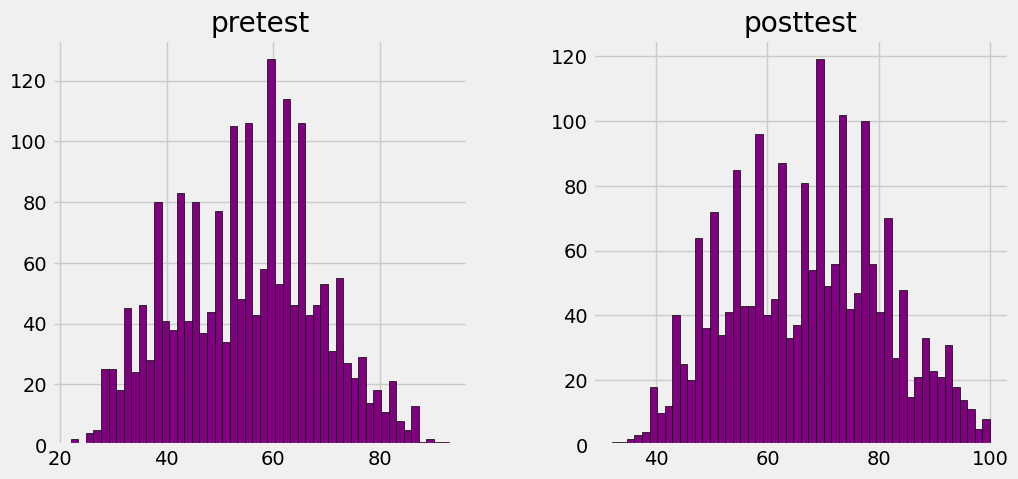

In [10]:
data.iloc[:,8:].hist(bins=50,figsize = (11,5), color="#800080", edgecolor="black") #Распределение данных по значениям

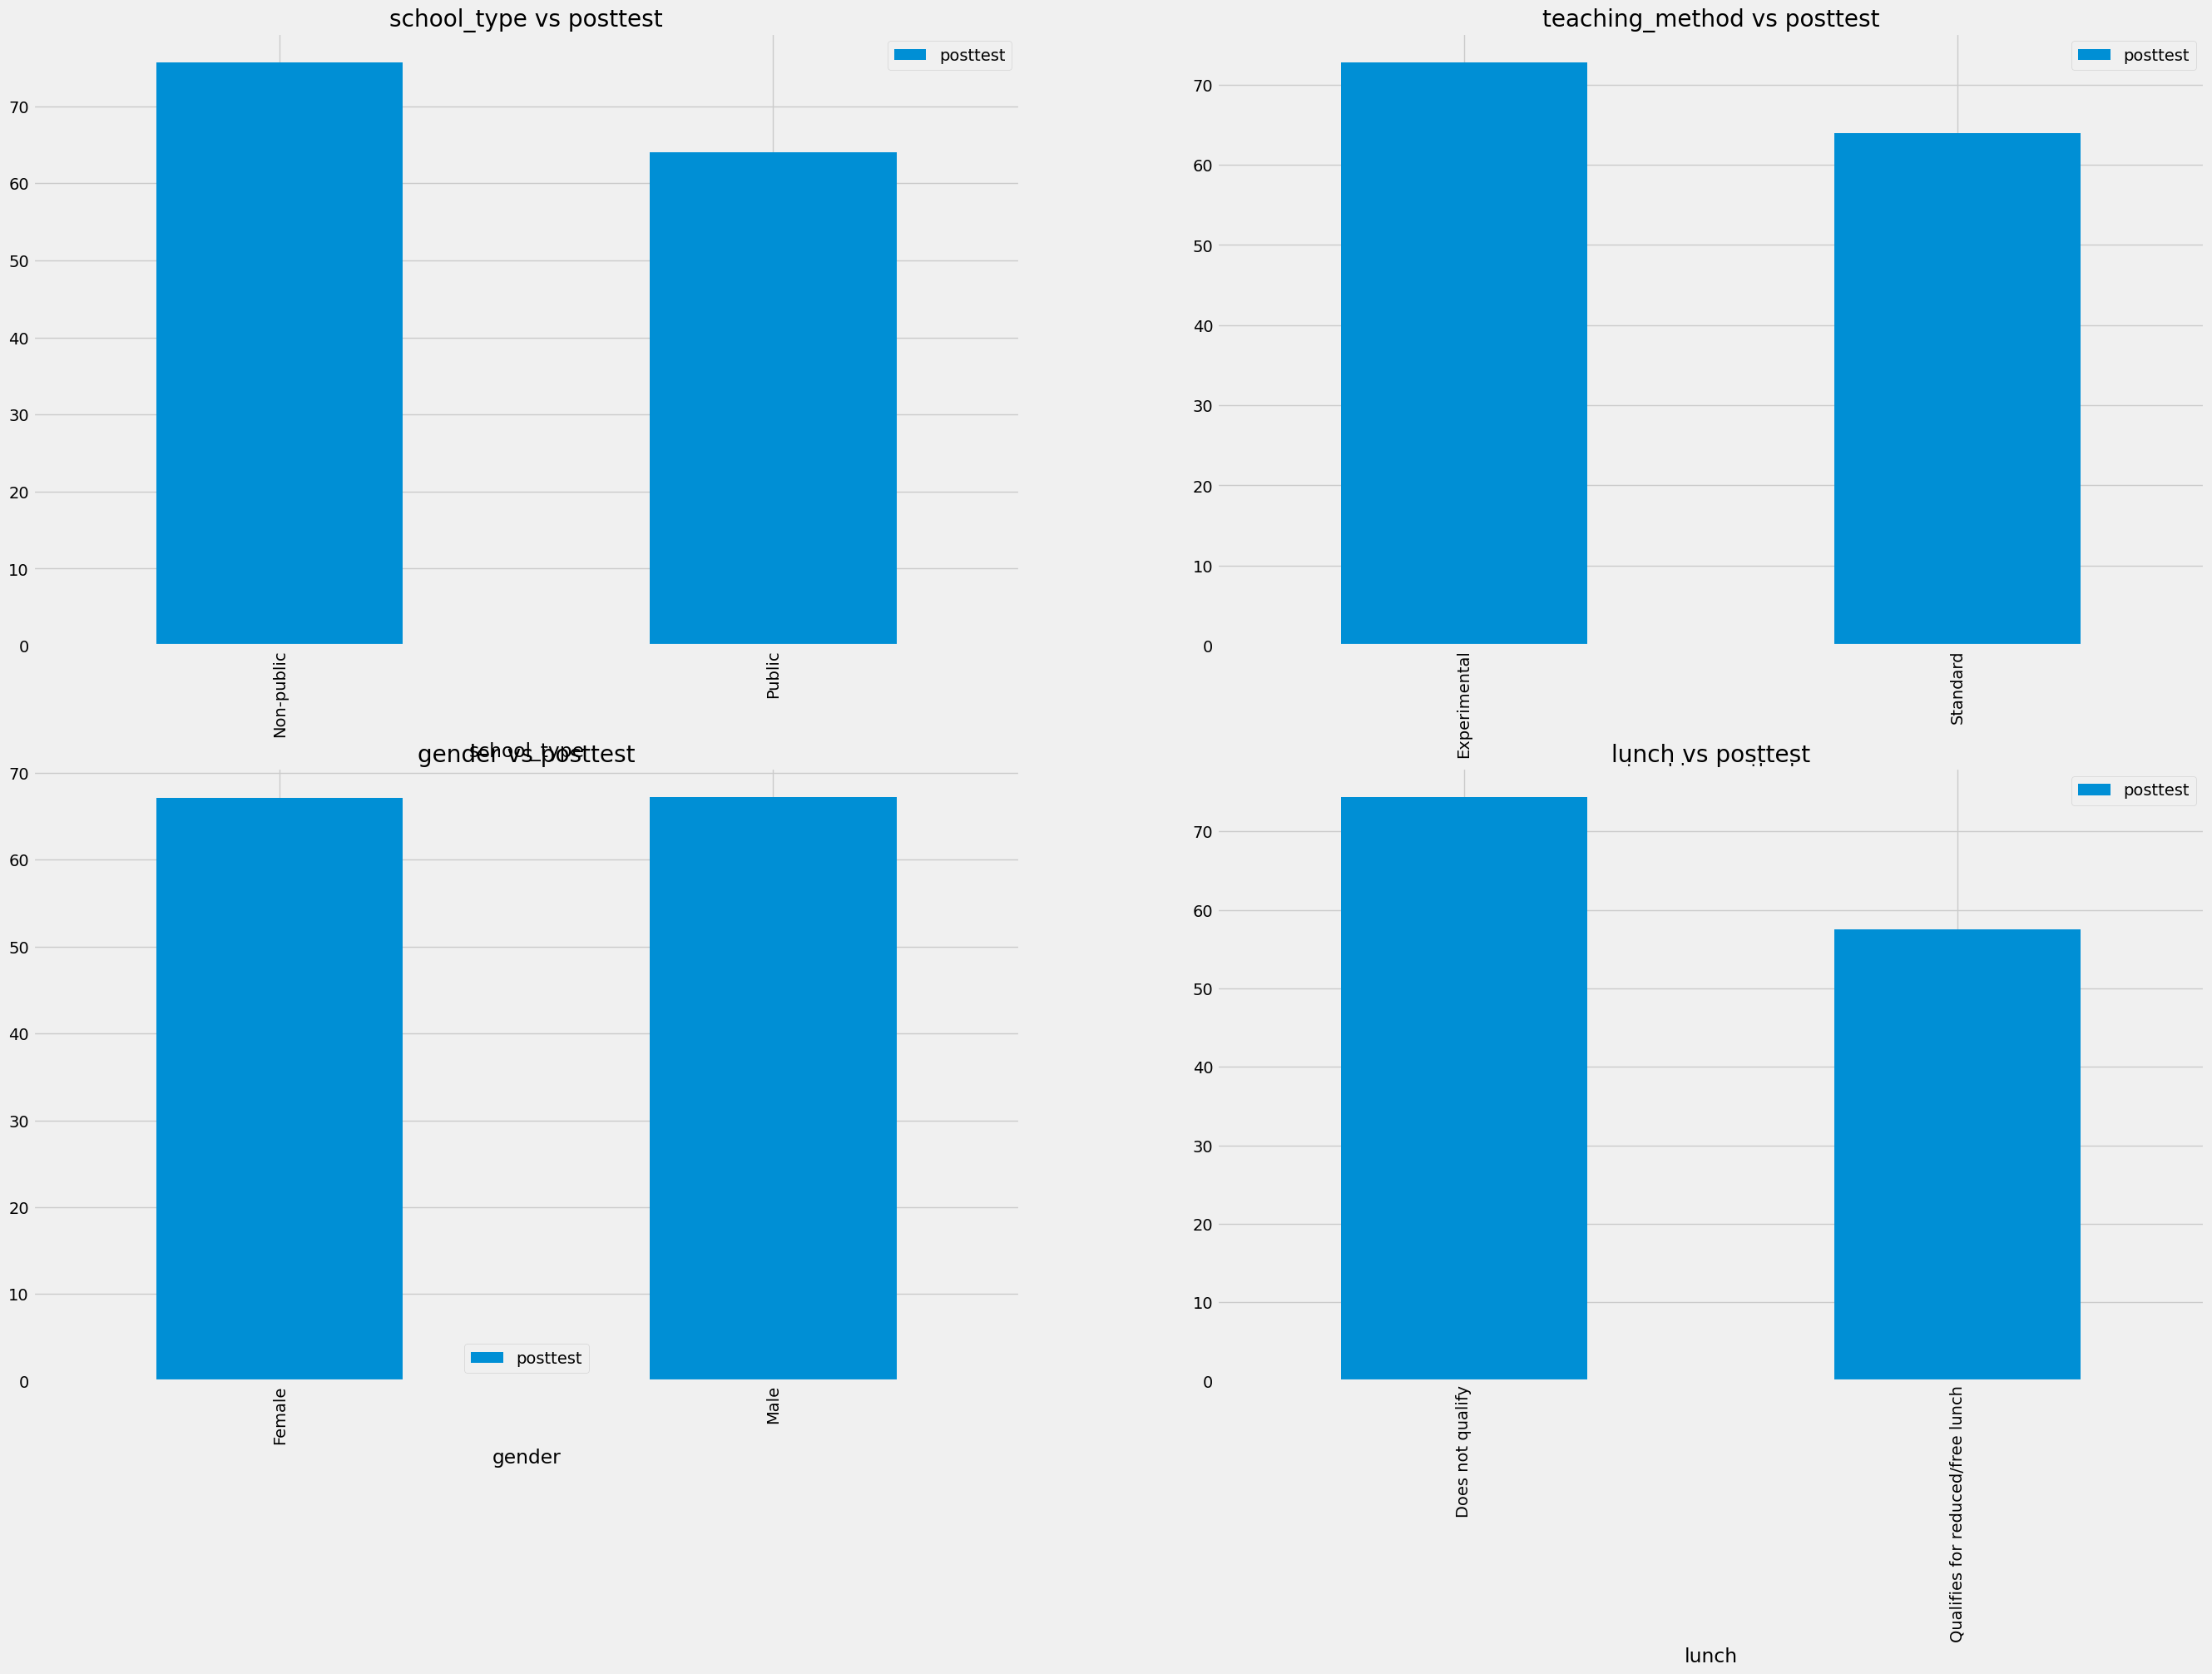

In [11]:
out = [i>=50 for i in data['posttest']]

f,ax=plt.subplots(2,2,figsize=(30,20))

data[['school_type','posttest']].groupby(['school_type']).mean().plot.bar(ax=ax[0,0])
ax[0,0].set_title('school_type vs posttest')

data[['teaching_method','posttest']].groupby(['teaching_method']).mean().plot.bar(ax=ax[0,1])
ax[0,1].set_title('teaching_method vs posttest')

data[['gender','posttest']].groupby(['gender']).mean().plot.bar(ax=ax[1,0])
ax[1,0].set_title('gender vs posttest')

data[['lunch','posttest']].groupby(['lunch']).mean().plot.bar(ax=ax[1,1])
ax[1,1].set_title('lunch vs posttest')

plt.show()

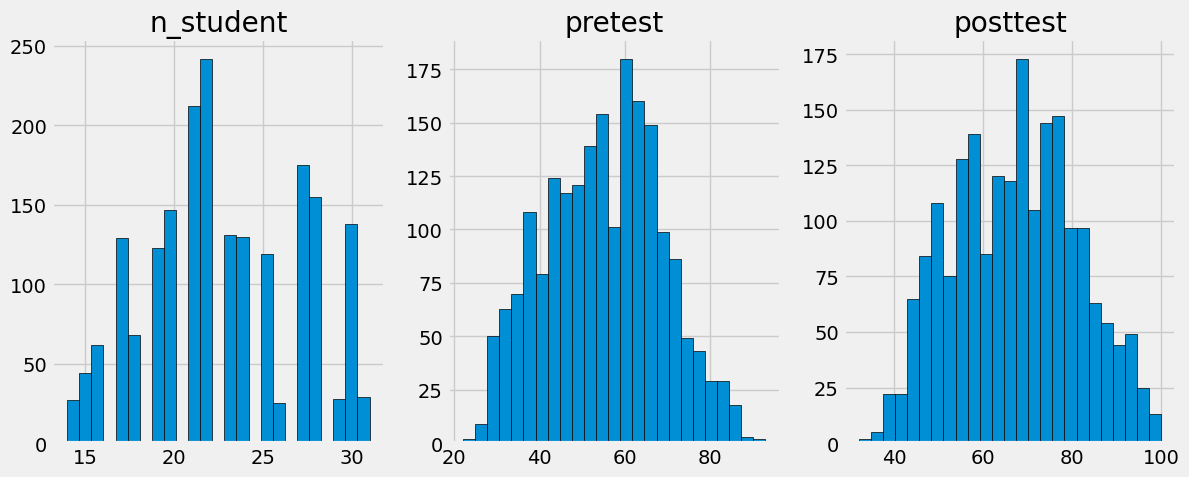

In [12]:
data.hist(bins=25, figsize=(20, 5), layout=(-1, 5), edgecolor="black")
plt.tight_layout();

<Axes: >

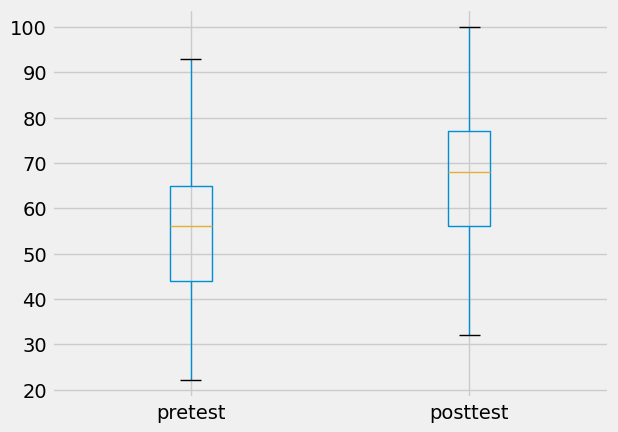

In [13]:
data[['pretest','posttest']].boxplot()

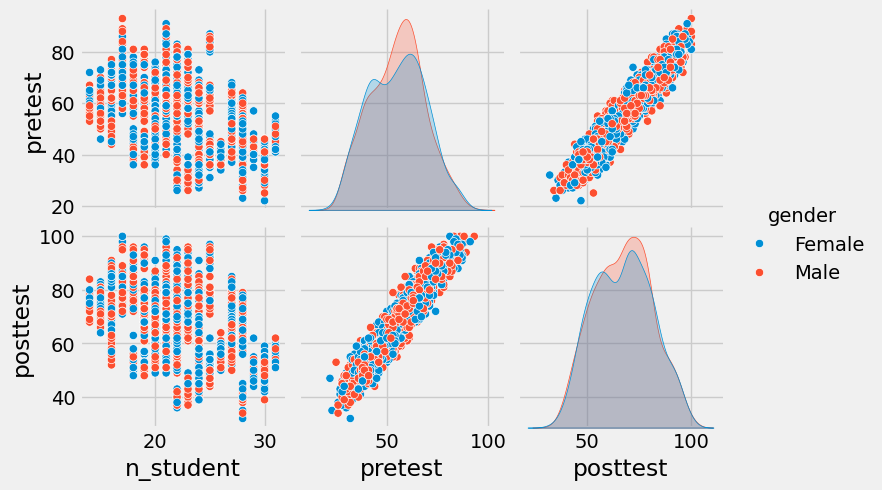

In [14]:
sns.pairplot(data,x_vars=['n_student','pretest','posttest'],
            y_vars=['pretest','posttest'],hue='gender')

<Axes: xlabel='posttest', ylabel='Count'>

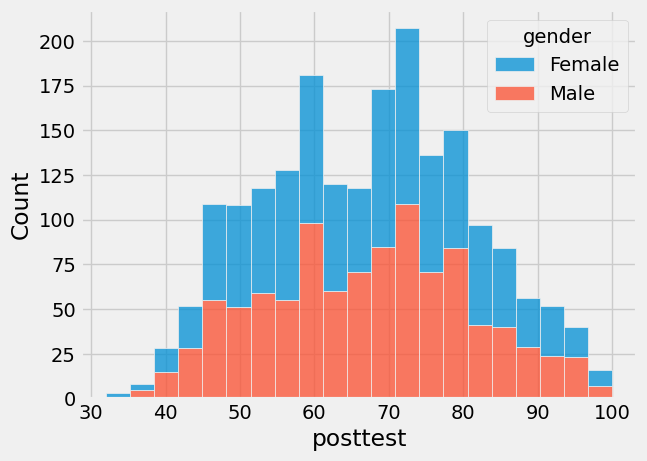

In [15]:
sns.histplot(data,x='posttest',hue='gender',multiple='stack')

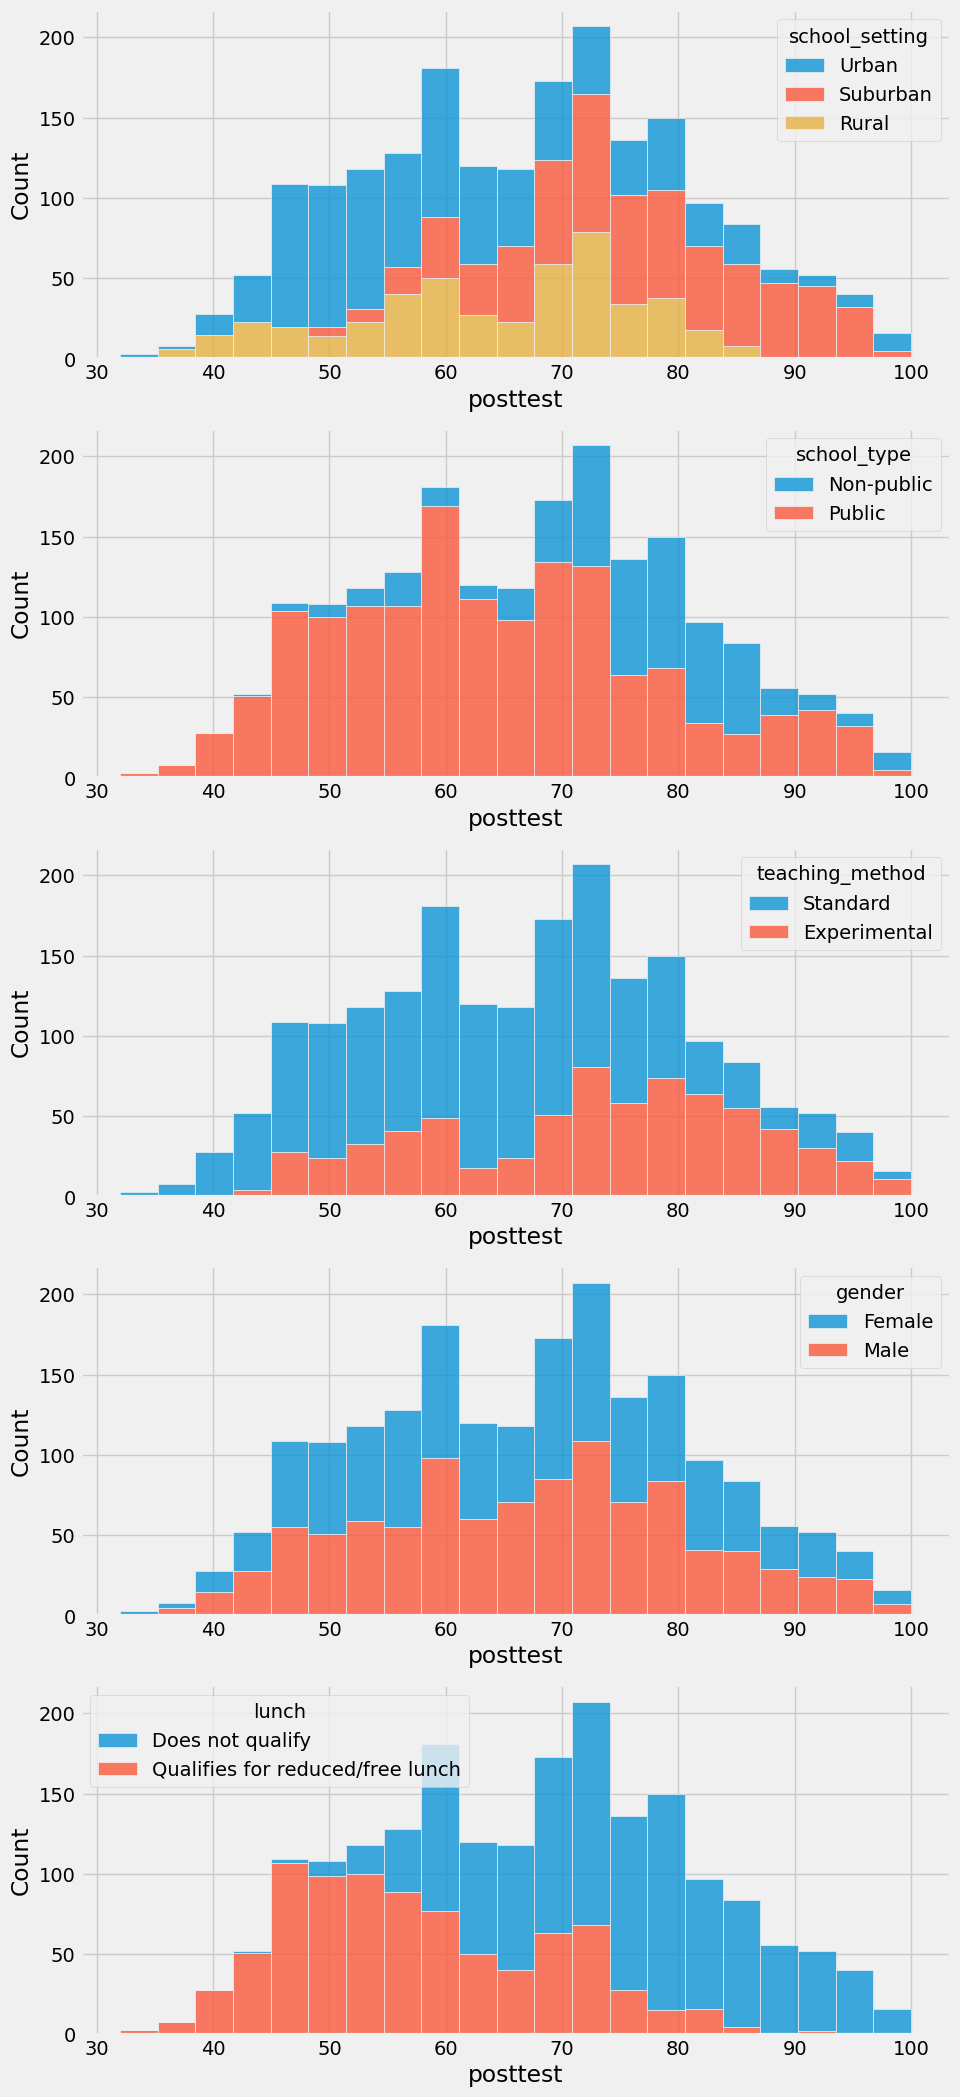

In [16]:
columns = ['school_setting','school_type','teaching_method','gender','lunch']
fig, axs = plt.subplots(len(columns),1,figsize=(10,5*len(columns)))

for i in range(len(columns)):
    sns.histplot(data,x='posttest',hue=columns[i],multiple='stack',ax=axs[i])